In [1]:
import re
import requests
import time
import os
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

First we download the pages listing all Radiohead and Kate Bush songs:

In [2]:
url_rhead_page = "https://www.lyrics.com/artist/Radiohead/41092"

In [3]:
url_kb_page = "https://www.lyrics.com/artist/Kate-Bush/3805"

In [4]:
result_rhead = requests.get(url_rhead_page)

In [5]:
result_kb = requests.get(url_kb_page)

In [6]:
r_rhead = result_rhead.text

In [7]:
r_kb = result_kb.text

Then we do a RegEx to extract the rest of the URL links we will need to access the individual song lyrics:

In [8]:
pattern = 'href="(/lyric/\d+/[a-z\+]+/[^"]+)"'

In [9]:
list_of_songs_rhead = re.findall(pattern, r_rhead, re.IGNORECASE)
list_of_songs_rhead

['/lyric/1943143/Radiohead/Lurgee',
 '/lyric/10519958/Radiohead/Street+Spirit+%28Fade+Out%29+%5BAlbum+Version%5D',
 '/lyric/14704093/Radiohead/Exit+Music',
 '/lyric/14704084/Radiohead/Subteranean+Homesick+Alien',
 '/lyric/25134231/Radiohead/The+Daily+Mail',
 '/lyric/25134225/Radiohead/Staircase',
 '/lyric/1942885/Radiohead/Bishop%27s+Robes',
 '/lyric/19273004/Radiohead/There%2C+There',
 '/lyric/5669122/Radiohead/Blow+Out+%5BRemix%5D',
 '/lyric/5669123/Radiohead/Inside+My+Head+%5BLive%5D',
 '/lyric/5669121/Radiohead/Yes+I+Am',
 '/lyric/19528072/Radiohead/Prove+Yourself+%5BDemo%5D',
 '/lyric/16433539/Radiohead/Banana+Co.+%5BAcoustic%5D',
 '/lyric/16433536/Radiohead/Faithless%2C+The+Wonderboy',
 '/lyric/16433529/Radiohead/Million+Dollar+Question',
 '/lyric/16433541/Radiohead/Stop+Whispering+%5BU.S.+Version%5D',
 '/lyric/16294108/Radiohead/Coke+Babies+%5B%2A%5D',
 '/lyric/16294107/Radiohead/Faithless%2C+the+Wonderboy+%5B%2A%5D',
 '/lyric/16294115/Radiohead/I+Can%27t+%5B%2A%5D',
 '/lyric/16

In [10]:
list_of_songs_kb = re.findall(pattern, r_kb, re.IGNORECASE)
list_of_songs_kb

['/lyric/1550314/Kate+Bush/Don%27t+Give+Up+%5BLive%5D',
 '/lyric/1550320/Kate+Bush/The+Kick+Inside',
 '/lyric/1550311/Kate+Bush/Man+With+the+Child+in+His+Eyes+%5BLive%5D',
 '/lyric/1550319/Kate+Bush/The+Seer',
 '/lyric/23273496/Kate+Bush/Cloud+Busting',
 '/lyric/3936078/Kate+Bush/Blow+Away',
 '/lyric/275674/Kate+Bush/Wedding+List',
 '/lyric/3936742/Kate+Bush/And+Dream+of+Sheep',
 '/lyric/3936737/Kate+Bush/Running+Up+That+Hill+%28A+Deal+With+God%29',
 '/lyric/3422181/Kate+Bush/The+Big+Sky',
 '/lyric/3422190/Kate+Bush/The+Morning+Fog',
 '/lyric/3422182/Kate+Bush/Mother+Stands+for+Comfort',
 '/lyric/3422196/Kate+Bush/My+Lagan+Love+%5B%2A%5D',
 '/lyric/3422185/Kate+Bush/Under+Ice',
 '/lyric/3422186/Kate+Bush/Waking+the+Witch',
 '/lyric/1538366/Kate+Bush/Army+Dreamers',
 '/lyric/1538370/Kate+Bush/Babooshka',
 '/lyric/1538362/Kate+Bush/Breathing',
 '/lyric/1538360/Kate+Bush/Cloudbusting',
 '/lyric/1538369/Kate+Bush/The+Dreaming',
 '/lyric/1538368/Kate+Bush/Experiment+IV',
 '/lyric/1538364/Ka

Iterate through the lists of songs and tag on the website URL at the beginning to create a list of links:

In [11]:
base = 'https://www.lyrics.com'

In [12]:
list_of_links_rhead = []
for i in list_of_songs_rhead:
    url = base + i
    list_of_links_rhead.append(url)

In [13]:
list_of_links_kb = []
for i in list_of_songs_kb:
    url = base + i
    list_of_links_kb.append(url)

In [14]:
list_of_links_kb

['https://www.lyrics.com/lyric/1550314/Kate+Bush/Don%27t+Give+Up+%5BLive%5D',
 'https://www.lyrics.com/lyric/1550320/Kate+Bush/The+Kick+Inside',
 'https://www.lyrics.com/lyric/1550311/Kate+Bush/Man+With+the+Child+in+His+Eyes+%5BLive%5D',
 'https://www.lyrics.com/lyric/1550319/Kate+Bush/The+Seer',
 'https://www.lyrics.com/lyric/23273496/Kate+Bush/Cloud+Busting',
 'https://www.lyrics.com/lyric/3936078/Kate+Bush/Blow+Away',
 'https://www.lyrics.com/lyric/275674/Kate+Bush/Wedding+List',
 'https://www.lyrics.com/lyric/3936742/Kate+Bush/And+Dream+of+Sheep',
 'https://www.lyrics.com/lyric/3936737/Kate+Bush/Running+Up+That+Hill+%28A+Deal+With+God%29',
 'https://www.lyrics.com/lyric/3422181/Kate+Bush/The+Big+Sky',
 'https://www.lyrics.com/lyric/3422190/Kate+Bush/The+Morning+Fog',
 'https://www.lyrics.com/lyric/3422182/Kate+Bush/Mother+Stands+for+Comfort',
 'https://www.lyrics.com/lyric/3422196/Kate+Bush/My+Lagan+Love+%5B%2A%5D',
 'https://www.lyrics.com/lyric/3422185/Kate+Bush/Under+Ice',
 'htt

In [15]:
len(list_of_links_kb)

147

Now we create a for loop to access each link and create a txt file containing the lyrics for each song. We also include some formatting to tidy up the filenames, which then enables us to also remove duplicates by saving over them. This involves a series of regular expressions to omit:
* anything within any type of brackets
* followed by whitespace
* any additional punctuation (with the exception of '-')

Dots are removed, artist name added and finally the '.txt' extension added back at the end:

In [16]:
brackets = '%5B.+%5D'
parens = '%28.+%29'
whitespace = '/s+'
pluses = '\+'
fullstops = '\.'
other_punct = '%\w\w'

In [ ]:
for link in list_of_links_rhead:
    f = requests.get(link)
    e = f.text
    ln = link.find('Radiohead')
    filename = f'{link[ln+10:]}'
    filename = re.sub(brackets, '', filename)
    filename = re.sub(parens, '', filename)
    filename = re.sub(whitespace, '', filename)
    filename = re.sub(pluses, '', filename)
    filename = re.sub(fullstops, '', filename)
    filename = re.sub(other_punct, '', filename)
    filename = 'Radiohead-' + filename + '.txt'
    file = open(filename, 'w', encoding='utf-8')
    file.write(e)
    time.sleep(5)
    file.close()

In [ ]:
for link in list_of_links_kb:
    f = requests.get(link)
    e = f.text
    ln = link.find('Kate+Bush')
    filename = f'{link[ln+10:]}'
    filename = re.sub(brackets, '', filename)
    filename = re.sub(parens, '', filename)
    filename = re.sub(whitespace, '', filename)
    filename = re.sub(pluses, '', filename)
    filename = re.sub(fullstops, '', filename)
    filename = re.sub(other_punct, '', filename)
    filename = 'KateBush-' + filename + '.txt'
    file = open(filename, 'w', encoding='utf-8')
    file.write(e)
    time.sleep(5)
    file.close()

Then we open one of these files and try to clean it up with BeautifulSoup:

In [17]:
html = open("Radiohead-ThereThere.txt")

In [18]:
html

<_io.TextIOWrapper name='Radiohead-ThereThere.txt' mode='r' encoding='cp1252'>

In [19]:
doc = html.read()

In [20]:
soup = BeautifulSoup(doc)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]--><!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]--><!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en"> <!--<![endif]--><head>
<!-- DFP head code - START -->
<script>
    var adsStart = (new Date()).getTime();
    function detectWidth() {
        return window.screen.width || window.innerWidth || window.document.documentElement.clientWidth || Math.min(window.innerWidth, window.document.documentElement.clientWidth) || window.innerWidth || window.document.documentElement.clientWidth || window.document.getElementsByTagName('body')[0].clientWidth;
    }

    var TIMEOUT = 1000;
    var EXCHANGE_RATE = 3.6;
    var screenSizeMobile = 768;

    var googletag = googletag || {};
    googletag.cmd = googletag.cmd || [];
    var pbjs = pbjs || {};
    pbjs.que = pbjs.que || [];
    var adUnits = adUnits || []
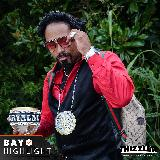

In [21]:
soup

In [22]:
clean = soup.find_all('pre')

In [23]:
len(clean)

1

In [24]:
clean = clean[0]

In [25]:
type(clean)

bs4.element.Tag

In [26]:
there_there = clean.text
there_there

"In pitch dark \n\nI go walking in your landscape \n\nBroken branches \n\nTrip me as I speak \n\n\n\nJust 'cause you feel it \n\nDoesn't mean it's there \n\nJust 'cause you feel it \n\nDoesn't mean it's there \n\n\n\nThere's always a siren \n\nSinging you to shipwreck \n\n(Don't reach out, don't reach out \n\nDon't reach out, don't reach out) \n\nSteer away from each rocks \n\nWe'd be a walking disaster \n\n(Don't reach out, don't reach out \n\nDon't reach out, don't reach out) \n\n\n\nJust 'cause you feel it \n\nDoesn't mean it's there \n\n(Someone on your shoulder \n\nSomeone on your shoulder) \n\nJust 'cause you feel it \n\nDoesn't mean it's there \n\n(Someone on your shoulder \n\nSomeone on your shoulder) \n\nThere there! \n\n\n\nWhy so green and lonely? \n\nLonely, lonely? \n\n\n\nHeaven sent you to me \n\nTo me, to me? \n\n\n\nWe are accidents waiting \n\nWaiting to happen \n\n\n\nWe are accidents waiting \n\nWaiting to happen"

In [27]:
there_there = there_there.replace("\n", " ")
there_there

"In pitch dark   I go walking in your landscape   Broken branches   Trip me as I speak     Just 'cause you feel it   Doesn't mean it's there   Just 'cause you feel it   Doesn't mean it's there     There's always a siren   Singing you to shipwreck   (Don't reach out, don't reach out   Don't reach out, don't reach out)   Steer away from each rocks   We'd be a walking disaster   (Don't reach out, don't reach out   Don't reach out, don't reach out)     Just 'cause you feel it   Doesn't mean it's there   (Someone on your shoulder   Someone on your shoulder)   Just 'cause you feel it   Doesn't mean it's there   (Someone on your shoulder   Someone on your shoulder)   There there!     Why so green and lonely?   Lonely, lonely?     Heaven sent you to me   To me, to me?     We are accidents waiting   Waiting to happen     We are accidents waiting   Waiting to happen"

In [28]:
html.close()

Next step is to iterate through all the txt files we have saved away, clean them up in a similar way and save them to a list of strings:

In [29]:
directory_in_str = r'C:\Users\Dave\Desktop\Week_4\song_lyrics'
directory = os.fsencode(directory_in_str)

In [36]:
list_of_lyrics = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".txt"):
        html = open(filename)
        doc = html.read()
        html.close()
        soup = BeautifulSoup(doc)
        clean = soup.find_all('pre')[0].text.replace("\n", " ")
        list_of_lyrics.append(clean)


In [37]:
list_of_lyrics

["1 drifting  2 twisting  3 whiteout  4 blackbird braille  5 Wenceslasaire  6 avalanche  Come on man, you've got 44 to go,  come on man, you've got 44 to go.  Come on man, you've got 44 to go,  come on man, you've got 44 to go.  7 swans-a-melting  8 deamondi-pavlova  9 eiderfalls  10 Santanyeroofdikov  11 stellatundra  12 hunter's dream  13 faloop'njoompoola  14 zebranivem  15 spangladasha  16 albadune  17 hironocrashka  18 hooded-wept  Come on Joe, you've got 32 to go,  come on Joe, you've got 32 to go.  Come on now, you've got 32 to go,  come on now, you've got 32 to go.  Don't you know it's not just the Eskimo.  Let me hear your 50 words for snow.  19 phlegm de neige  20 mountainsob  21 anklebreaker  22 erase-o-dust  23 shnamistoflopp'n  24 terrablizza  25 whirlissimo  26 vanilla swarm  27 icyskidski  28 robber's veil  Come on Joe, just 22 to go,  come on Joe, just 22 to go.  Come on Joe, just you and the Eskimos,  Come on now, just 22 to go.  Come on now, just 22 to go,  Let me hea

Now we have a list of all lyrics, which still requires some parsing:
* we remove anything inside square brackets as these do not contain lyrics
* we use regular expressions to replace all instances of "â€™" with apostrophes

In [38]:
apostrophes = r"â€™"
squarebrackets = r"\[.+\]"

In [39]:
corpus_rhkb = []
for lyric in list_of_lyrics:
    lyric = re.sub(squarebrackets, '', lyric)
    lyric = re.sub(apostrophes, "'", lyric)
    corpus_rhkb.append(lyric)

In [40]:
corpus_rhkb

["1 drifting  2 twisting  3 whiteout  4 blackbird braille  5 Wenceslasaire  6 avalanche  Come on man, you've got 44 to go,  come on man, you've got 44 to go.  Come on man, you've got 44 to go,  come on man, you've got 44 to go.  7 swans-a-melting  8 deamondi-pavlova  9 eiderfalls  10 Santanyeroofdikov  11 stellatundra  12 hunter's dream  13 faloop'njoompoola  14 zebranivem  15 spangladasha  16 albadune  17 hironocrashka  18 hooded-wept  Come on Joe, you've got 32 to go,  come on Joe, you've got 32 to go.  Come on now, you've got 32 to go,  come on now, you've got 32 to go.  Don't you know it's not just the Eskimo.  Let me hear your 50 words for snow.  19 phlegm de neige  20 mountainsob  21 anklebreaker  22 erase-o-dust  23 shnamistoflopp'n  24 terrablizza  25 whirlissimo  26 vanilla swarm  27 icyskidski  28 robber's veil  Come on Joe, just 22 to go,  come on Joe, just 22 to go.  Come on Joe, just you and the Eskimos,  Come on now, just 22 to go.  Come on now, just 22 to go,  Let me hea

### This is our cleaned text corpus! We can now begin to train and apply our Naive Bayes classifier to predict whether a lyric "belongs" more to Radiohead or Kate Bush:

In [41]:
len(corpus_rhkb)

273

We create our labels - a list of Kate Bush 125 times followed by Radiohead 148 times:

In [42]:
labels = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".txt"):
        if filename.startswith("Kate"):
            labels.append("Kate Bush")
        else:
            labels.append("Radiohead")

labels

['Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate Bush',
 'Kate

Then we define the Count Vectorizer and tell it to remove English stop words:

In [43]:
cv = CountVectorizer(stop_words="english")

In [44]:
vec = cv.fit_transform(corpus_rhkb)

In [45]:
vec

<273x3688 sparse matrix of type '<class 'numpy.int64'>'
	with 10235 stored elements in Compressed Sparse Row format>

sklearn stores the data as a 'sparse matrix', which we can't directly see yet. This is a special, memory-saving way to save data in long-format. We can see that it's 273x3688 because there are 273 songs and 3,688 distinct words

In [47]:
cv.vocabulary_

{'drifting': 939,
 'twisting': 3402,
 'whiteout': 3585,
 'blackbird': 314,
 'braille': 394,
 'wenceslasaire': 3560,
 'avalanche': 183,
 'come': 654,
 'man': 1910,
 've': 3453,
 'got': 1342,
 '44': 43,
 'swans': 3151,
 'melting': 1954,
 'deamondi': 810,
 'pavlova': 2253,
 'eiderfalls': 1004,
 '10': 0,
 'santanyeroofdikov': 2687,
 '11': 1,
 'stellatundra': 3053,
 '12': 2,
 'hunter': 1547,
 'dream': 929,
 '13': 3,
 'faloop': 1097,
 'njoompoola': 2136,
 '14': 4,
 'zebranivem': 3683,
 '15': 6,
 'spangladasha': 2975,
 '16': 7,
 'albadune': 104,
 '17': 8,
 'hironocrashka': 1491,
 '18': 9,
 'hooded': 1514,
 'wept': 3562,
 'joe': 1641,
 '32': 28,
 'don': 910,
 'know': 1707,
 'just': 1659,
 'eskimo': 1046,
 'let': 1776,
 'hear': 1444,
 '50': 50,
 'words': 3634,
 'snow': 2929,
 '19': 11,
 'phlegm': 2282,
 'neige': 2110,
 '20': 12,
 'mountainsob': 2059,
 '21': 13,
 'anklebreaker': 130,
 '22': 15,
 'erase': 1040,
 'dust': 973,
 '23': 17,
 'shnamistoflopp': 2807,
 '24': 18,
 'terrablizza': 3239,
 '2

In [48]:
vec.data.shape

(10235,)

In [49]:
vec.todense()

matrix([[1, 1, 1, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
vec.todense().shape

(273, 3688)

To further explore our count-vector, we apply a TF-IDF transformation. This measures the "originality" of a word by comparing the number of times it appears in a document with the number of documents that the word appears in, overall.

In [51]:
tf = TfidfTransformer()

In [52]:
vec_tf = tf.fit_transform(vec)

In [53]:
vec_tf.todense()

matrix([[0.05994988, 0.05584385, 0.05994988, ..., 0.        , 0.05994988,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

So now our word data is normalised according to "originality", we can set up the model for training:

In [54]:
X = vec_tf

In [55]:
y = labels

In [56]:
m = MultinomialNB()
m.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
m.score(X, y)

0.9926739926739927

In [58]:
X.todense().shape

(273, 3688)

## Now to answer that age-old question: are 2pac's lyrics closer to Radiohead's or Kate Bush's?

We read in a txt file of 2pac lyrics:

In [85]:
cd old_lyric_files

C:\Users\Dave\Desktop\Week_4\song_lyrics\old_lyric_files


In [86]:
tupactxt = open('tupac.txt')

In [87]:
cd ..

C:\Users\Dave\Desktop\Week_4\song_lyrics


In [88]:
tupac = tupactxt.read()

In [93]:
soupac = BeautifulSoup(tupac)

In [118]:
tupactxt.close()

In [104]:
cleanpac_str = soupac.text.replace('\\n', ' ').replace("[with my mind", "(with my mind").replace("\\\'", "\'").replace('\n', '')
cleanpac_str

'["The nights grow cold My search for gold is leading nowhere Whichever lonely road I take It seems to go nowhere It\'s a fight to survive just until tomorrow How can I display what I know I\'m worthy of When they turn me away  The doors are closed to such as I A boy from nowhere But not to those who merely buy the right to go where They\'ll be met with respect, not humiliation A man\'s place on earth I have come to realize is decided by birth  So what\'s the future No matter where I go I will still belong in Andalusia Where we don\'t know where The next penny\'s coming from Something\'s wrong  I\'m bound to Spain, I won\'t remain A boy from nowhere There has to be a place for me And I must go there I don\'t fantasize, unlike a million others Who must bow and scrape For my one means of escape Is to flourish a cape  I\'ll fight all odds And fight the Gods if they oppose me I have to win, I won\'t give in No one who knows me would expect me to fail For the want of trying Not a man alive 

But this is still a single string - we need to make it into a list before we clean it further (remove square brackets etc. - if we remove anything within square brackets now, we will delete almost the whole string as there are square brackets around the outside!)

In [107]:
strtolst = '\[\"|\"\]'

In [110]:
cleanpac_str2 = re.sub(strtolst, '', cleanpac_str)
cleanpac_str2

'The nights grow cold My search for gold is leading nowhere Whichever lonely road I take It seems to go nowhere It\'s a fight to survive just until tomorrow How can I display what I know I\'m worthy of When they turn me away  The doors are closed to such as I A boy from nowhere But not to those who merely buy the right to go where They\'ll be met with respect, not humiliation A man\'s place on earth I have come to realize is decided by birth  So what\'s the future No matter where I go I will still belong in Andalusia Where we don\'t know where The next penny\'s coming from Something\'s wrong  I\'m bound to Spain, I won\'t remain A boy from nowhere There has to be a place for me And I must go there I don\'t fantasize, unlike a million others Who must bow and scrape For my one means of escape Is to flourish a cape  I\'ll fight all odds And fight the Gods if they oppose me I have to win, I won\'t give in No one who knows me would expect me to fail For the want of trying Not a man alive Ha

In [115]:
cleanpac_lst = cleanpac_str2.split('", "')
cleanpac_lst

["The nights grow cold My search for gold is leading nowhere Whichever lonely road I take It seems to go nowhere It's a fight to survive just until tomorrow How can I display what I know I'm worthy of When they turn me away  The doors are closed to such as I A boy from nowhere But not to those who merely buy the right to go where They'll be met with respect, not humiliation A man's place on earth I have come to realize is decided by birth  So what's the future No matter where I go I will still belong in Andalusia Where we don't know where The next penny's coming from Something's wrong  I'm bound to Spain, I won't remain A boy from nowhere There has to be a place for me And I must go there I don't fantasize, unlike a million others Who must bow and scrape For my one means of escape Is to flourish a cape  I'll fight all odds And fight the Gods if they oppose me I have to win, I won't give in No one who knows me would expect me to fail For the want of trying Not a man alive Had to beg or 

Now we have a list of 2pac lyrics. We finally remove the square brackets and their contents (as they are non-lyrical):

In [119]:
tupac = []
for lyric in cleanpac_lst:
    lyric = re.sub(squarebrackets, '', lyric)
    tupac.append(lyric)
tupac

["The nights grow cold My search for gold is leading nowhere Whichever lonely road I take It seems to go nowhere It's a fight to survive just until tomorrow How can I display what I know I'm worthy of When they turn me away  The doors are closed to such as I A boy from nowhere But not to those who merely buy the right to go where They'll be met with respect, not humiliation A man's place on earth I have come to realize is decided by birth  So what's the future No matter where I go I will still belong in Andalusia Where we don't know where The next penny's coming from Something's wrong  I'm bound to Spain, I won't remain A boy from nowhere There has to be a place for me And I must go there I don't fantasize, unlike a million others Who must bow and scrape For my one means of escape Is to flourish a cape  I'll fight all odds And fight the Gods if they oppose me I have to win, I won't give in No one who knows me would expect me to fail For the want of trying Not a man alive Had to beg or 

In [120]:
tupac_vec = cv.transform(tupac)

In [121]:
tupac_vec = tf.transform(tupac_vec)

In [122]:
m.predict(tupac_vec)

array(['Radiohead', 'Radiohead', 'Radiohead', 'Radiohead', 'Radiohead',
       'Radiohead', 'Radiohead', 'Radiohead', 'Radiohead', 'Radiohead',
       'Radiohead', 'Radiohead', 'Kate Bush', 'Radiohead', 'Radiohead',
       'Radiohead', 'Radiohead', 'Radiohead', 'Radiohead', 'Kate Bush',
       'Radiohead', 'Radiohead', 'Radiohead', 'Radiohead', 'Kate Bush',
       'Radiohead', 'Radiohead', 'Radiohead', 'Radiohead', 'Radiohead',
       'Radiohead', 'Radiohead'], dtype='<U9')

In [123]:
m.predict_proba(tupac_vec)

array([[0.43196507, 0.56803493],
       [0.49194176, 0.50805824],
       [0.33738744, 0.66261256],
       [0.38682172, 0.61317828],
       [0.33285259, 0.66714741],
       [0.34651345, 0.65348655],
       [0.45981743, 0.54018257],
       [0.3092086 , 0.6907914 ],
       [0.40541017, 0.59458983],
       [0.45156938, 0.54843062],
       [0.48153247, 0.51846753],
       [0.37708111, 0.62291889],
       [0.56631176, 0.43368824],
       [0.4486827 , 0.5513173 ],
       [0.46137944, 0.53862056],
       [0.49600862, 0.50399138],
       [0.39545822, 0.60454178],
       [0.41879573, 0.58120427],
       [0.45787546, 0.54212454],
       [0.51415237, 0.48584763],
       [0.39537537, 0.60462463],
       [0.40427306, 0.59572694],
       [0.41003558, 0.58996442],
       [0.46508063, 0.53491937],
       [0.50259179, 0.49740821],
       [0.39514772, 0.60485228],
       [0.40455128, 0.59544872],
       [0.4640867 , 0.5359133 ],
       [0.35057183, 0.64942817],
       [0.38338287, 0.61661713],
       [0.

So Radiohead's lyrics match 2pac's more than Kate Bush's do. Who would have thought it?!

Finally, we calculate the empirical log probability of features given a class, `P(x_i|y)`

In [124]:
m.feature_log_prob_

array([[-8.31541457, -8.26307152, -8.31541457, ..., -8.29778259,
        -8.31541457, -8.37363619],
       [-8.36780064, -8.36780064, -8.36780064, ..., -8.36780064,
        -8.36780064, -8.29089547]])

Then we can take the difference between the 2 in order to find out which words were the most "discriminating" features.

In [125]:
one = m.feature_log_prob_[0]
two = m.feature_log_prob_[1]

diff = one - two

In [126]:
df = pd.DataFrame(diff, index= list(sorted(cv.vocabulary_.keys())) ).sort_values(by=0, ascending=False)
df

,0
ooh,1.217529
love,1.061749
woman,1.003803
mmh,0.946821
rolling,0.864306
night,0.863766
water,0.793761
hear,0.735749
deeper,0.734851
tell,0.729337


SpaCy stuff:

In [ ]:
vec2 = cv.fit_transform(corpus_tupac)

In [ ]:
nlp = spacy.load(en_core_web_sm)

In [ ]:
first = nlp(corpus_rhead[0])

In [ ]:
first

In [ ]:
first.text

In [ ]:
corpus_rhead[0]

In [ ]:
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES

In [ ]:
lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)

In [ ]:
lemmas = lemmatizer('i ended up where i belonged', univ_pos = 'VERB')

In [ ]:
lemmas